In [ ]:
!pip3 install -q torch==2.0.1 torchvision==0.15 torchaudio==2.0.1

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a7c85ddc-c13c-6965-e794-9a89d130779f)


# 03. PyTorch Computer Vision

Example computer vision problems for binary classification, multiclass classification, object detection and segmentation:
![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.
![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| Topic | Contents |
| ----- | -------- |
| 0. Computer vision libraries in PyTorch | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out. |
| 1. Load data | To practice computer vision, we'll start with some images of different pieces of clothing from FashionMNIST. |
| 2. Prepare data | We've got some images, let's load them in with a PyTorch `DataLoader` so we can use them with our training loop |
| 3. Model 0: Building a baseline model | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **trainig loop**. |
| 4. Making predictions and evaluting model 0 | Let's make some predictions with our baseline model and evaluate them. |
| 5. Setup device agnostic code for future models | It's best practice to write devcie-agnostic code, so let's set it up. |
| 6. Model 1: Adding non-linearity | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| 7. Model 2: Convolutional Neural Network (CNN) | Time to get computer vision specific and introduce the powerful convolutional neural network architecture |
| 8. Comparing our models | We've built three different models, let's compare them. |
| 9. Evaluating our best model | Let's make some predictions on random images and evaluate our best model. |
| 10. Making a confusion matrix | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| 11. Saving and loading the best performing model | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch

| PyTorch module | What does it do? |
| -------------- | ---------------- |
| `torchvision` | Contains dataset, model architectures and image transformations often used for computer vision problems. |
| `torchvision.dataset` | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. it also contains a series of base classes for making custom dataset. |
| `torchvision.models` | This module contains well-performing and commonly used computer vision model architectures impolemented in PyTorch, you can use these with your own problems. |
| `torchvision.transforms` | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| `torch.utils.data.Dataset` | Base dataset class for PyTorch |
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

    Note: the `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

In [ ]:
# Import relevant dependencies
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import data Classes to manipulate with data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Import matplotlib for visualisation
import matplotlib.pyplot as plt
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Import Path for care files paths
from pathlib import Path
# Import timeit function for calculate training time
from timeit import default_timer as timer

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


## 1. Getting a dataset

To download `FashionMNIST` from `torchvision.datasets`, we provide the following parameters:
- `root: str` — which folder do you want to download the data to?
- `train: Bool` — do you want the training or test split?
- `download: Bool` — should the data be downloaded?
- `transform: torchvision.transforms` — what transformations would you like to do on the data?
- `target_transform` — you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameters options.

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",  # where to download data to?
    train=True,  # get training data
    download=True,  # download data if it doesn't exist on disk
    transform=ToTensor(),  # images come as PIL format, we want to torcn into Torch tensors
    target_transform=None  # you can transform labels as well
)
# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 8472571.56it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138919.46it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2610749.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6360022.68it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# See first traning sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

In [ ]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is `[1, 28, 28]` or more specifically:

```[color_channels=1, height=28, width=28]```

Having `color_channels=1` means the image is grayscale.
![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the RGB color model).


In [ ]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

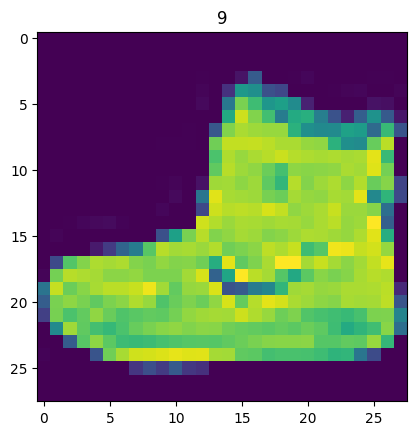

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())  # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

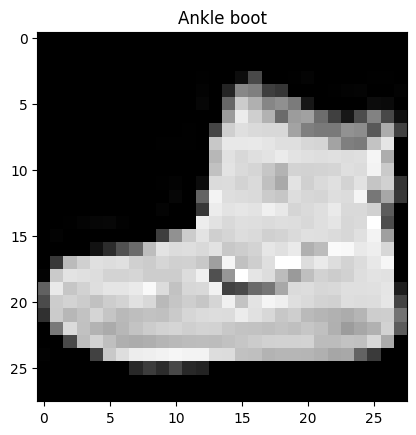

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

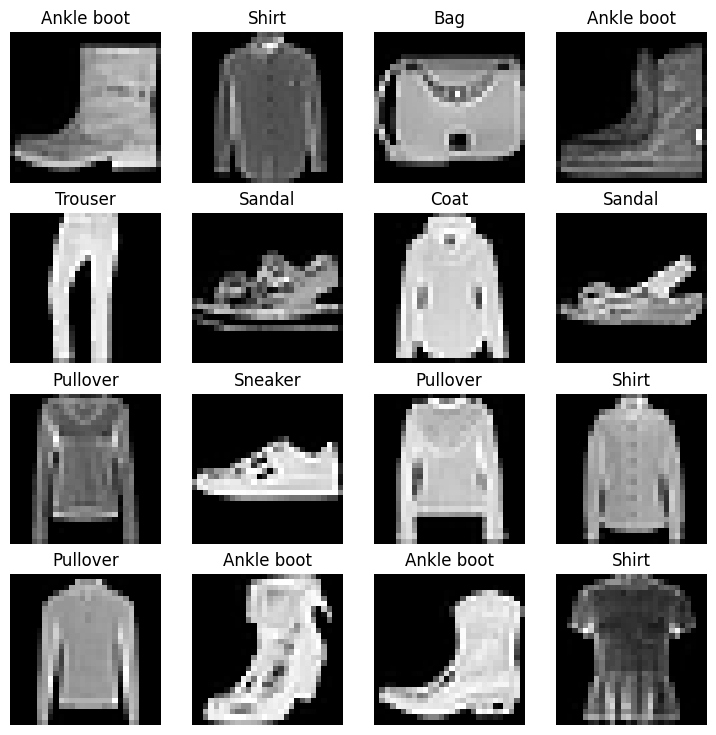

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

In [ ]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,  # dataset to turn into iterable
                              batch_size=BATCH_SIZE,  # how many samples per batch?
                              shuffle=True  # shuffle data every epoch?
                              )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False  # don't necessarily have to shuffle the testing data
                             )

In [ ]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d57907b3fd0>, <torch.utils.data.dataloader.DataLoader object at 0x7d57907b3bb0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


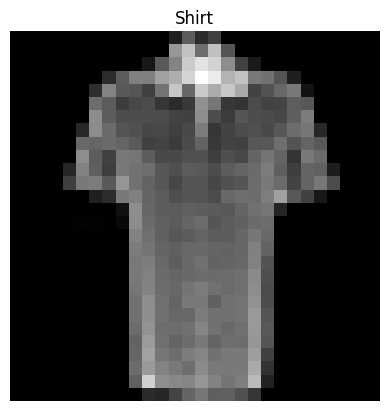

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()  # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

# Try uncommenting below and see what happens
print(x)
print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # neural network like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

We'll need to set the following parameters:
- `intput_shape=784` — this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
- `hidden_units=10` — number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
- `output_shape=len(class_names)` — since we're working with a multi-class classification problem , we need an output neuron per class in our dataset.

In [ ]:
torch.manual_seed(42)

# Need to setup model with input parameters
baseline_model = FashionMNISTModelV0(input_shape=784,  # one for every pixel (28x28)
                                     hidden_units=10,  # how many units in the hiden layer
                                     output_shape=len(class_names))  # one for every class

baseline_model.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

In [ ]:
import requests

# Download helpe functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_function.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_function.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

In [ ]:
# Import accuracy metrics
from helper_functions import accuracy_fn
# Note: could also use torchmetrics.Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=baseline_model.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

In [ ]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None) -> float:
    """
    Prints difference between start and end time.
    :param start: Start time of computation (preferred in timeit format);
    :param end: End time of computation;
    :param device: Device that compute is runing on. Defaults to None;

    :return: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a trainig loop and training a model on batches of data

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Set the seed and start the time
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        baseline_model.train()
        # 1. Forward pass
        y_preds = baseline_model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_preds, y)
        train_loss += loss  # accumulatively add up the loss per epoch

        # 3. Optimizer zero gradient
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    baseline_model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_preds = baseline_model(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_preds, y)  # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# Calculate trainign time
train_time_end_on_cpu = timer()
total_train_time_baseline_model = print_train_time(start=train_time_start_on_cpu,
                                                   end=train_time_end_on_cpu,
                                                   device=str(next(baseline_model.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4552 | Test Loss: 0.4725
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4444 | Test Loss: 0.4682
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.4361 | Test Loss: 0.4683
Train time on cpu: 31.816 seconds


## 4. Make predictions and get Model 0 results

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictinary containing the results of model predicting on data_loader.
    :param model: A PyTorch model capable of making predictions on data_loader;
    :param data_loader: The target dataset to predict on;
    :param loss_fn: The loss function of model;
    :param accuracy_fn: An accuracy function to compare the models predictions to the truth labels;

    :return: Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_preds = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_preds, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_preds.argmax(dim=1))  # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and accuracy to find the average loss/accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
torch.manual_seed(42)
# Calculate baseline model (model 0) results on test dataset
baseline_model_results = eval_model(model=baseline_model, data_loader=test_dataloader,
                                    loss_fn=loss_fn, accuracy_fn=accuracy_fn)
baseline_model_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46825188398361206,
 'model_acc': 83.73602236421725}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  #number of input features
                              hidden_units=10,
                              output_shape=len(class_names)  # number of output classes desired
                              ).to(device)  # send model to GPU if it's available
next(model_1.parameters()).device  # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and test loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_preds = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_preds.argmax(dim=1))  # Go from logits -> prediction labels

        # 3. Optimizer zero gradients
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_preds = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_preds.argmax(dim=1))  # Go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Train model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)

    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.0920 | Train Accuracy: 61.34%
Test Loss: 0.9564 | Test Accuracy: 65.00%

Epoch: 1
---------
Train Loss: 0.7810 | Train Accuracy: 71.93%
Test Loss: 0.7223 | Test Accuracy: 73.91%

Epoch: 2
---------
Train Loss: 0.6703 | Train Accuracy: 75.94%
Test Loss: 0.6850 | Test Accuracy: 75.02%

Train time on cuda: 34.151 seconds


In [ ]:
# Evaluate model
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

RuntimeError: ignored

In [ ]:
# Recreate functions to evaluating process for device-agnostic code
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """
    Evaluates a given model on a given dataset.

    :param model: A PyTorch model capable of making predictions on data_loader;
    :param data_loader: The target dataset to predict on;
    :param loss_fn: The loss function of model;
    :param accuracy_fn: An accuracy function to compare the models predictions to the truth labels;
    :param device: Target device to compute on. Defaults to device;

    :return: Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            y_preds = model(X)

            # Calculate loss and accuracy
            loss += loss_fn(y_preds, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_preds.argmax(dim=1))

        # Scale loss and accuracy
        loss /= len(data_loader)
        acc /=len(data_loader)
    return {"model_name": model.__class__.__name__,  # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
torch.manual_seed(42)
# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
baseline_model_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46825188398361206,
 'model_acc': 83.73602236421725}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

### What model should I use?

This table is a good general guide for which model to use (though there are exceptions).

| Problem type | Model to use (generally) | Code example |
| ------------ | ------------------------ | ------------ |
| Structured data (Excel spredsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | `sklearn.ensemble, XGBoost library` |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | `torchvision.models, HuggingFace Transformers` |


In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):

        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,  # how big is the square that's going over the image?
                      stride=1,  # default
                      padding=1),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)  # default stride value is same as kernel_size
            )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64))  # [batch_size, color_channels, height, width]
test_image = images[0]  # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
- `in_channels` (int) — Number of channels in the input image.
- `out_channels` (int) — Number of channels produced by the convolution.
- `kernel_size` (int or tuple) — Size of the convolving kernel/filter.
- `stride` (int or tuple, optional) — How big of a step the convolving kernel takes at a time. Default: 1.
- `padding` (int, tuple, str) — Padding added to all four sides of input. Default: 0.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changning any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=4,
                       stride=1,
                       padding="same")  # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1003.)
  return F.conv2d(input, weight, bias, self.stride,


tensor([[[ 4.0822e-01, -1.6816e-01,  4.9536e-01,  ...,  9.9128e-01,
          -1.5273e-01,  7.8459e-01],
         [ 1.3015e-01, -2.5837e-01,  6.4546e-01,  ...,  1.7600e+00,
          -2.1712e-01,  5.5654e-01],
         [ 2.5285e-01,  6.2112e-01,  1.5821e-01,  ...,  3.6483e-01,
           4.0041e-01, -2.9196e-01],
         ...,
         [ 2.3509e-01,  1.8000e-01, -4.1106e-01,  ...,  1.0583e+00,
          -1.1637e-01,  4.1478e-01],
         [ 4.9066e-01, -2.7327e-02,  7.2276e-01,  ...,  1.0329e+00,
          -2.7745e-02,  1.3643e-01],
         [ 9.5011e-02,  4.6688e-01,  1.2752e-01,  ..., -2.9918e-02,
          -8.7149e-02,  1.2447e-01]],

        [[-2.8951e-01,  6.2104e-01,  3.9625e-02,  ...,  2.0430e-02,
           2.5579e-01,  2.4471e-01],
         [-9.2135e-02, -1.7256e-01,  6.6074e-01,  ..., -1.5110e+00,
           3.7986e-01, -1.9034e-01],
         [-2.0782e-01, -7.5587e-01, -2.6148e-01,  ...,  1.4945e-01,
          -1.6930e-01,  4.8524e-01],
         ...,
         [-3.8906e-01, -8

Note: If running PyTorch `<1.11.0`, this will error because of shape issues (nn.Conv2d() expects a 4d tensor as input)

Right now our single iamge `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.

We can fix this error for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [ ]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 64, 64])

Notice what happens to our shape, we get different channel sizes as well as different pixel sizes.

What if we changed the values of `conv_layer`?

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3,  # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5),  # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape:\n {conv_layer_2.weight.shape} -> [out_channels=10, in_channels=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape:\n {conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape:
 torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=5, kernel_size=5]

conv_layer_2 bias shape:
 torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [ ]:
# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

In [ ]:
# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer():\n {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer():
 torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=1)  # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 2, 2])


Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to *compress* information.

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compression.

### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Trainig and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)

# Measure time
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.4485 | Train Accuracy: 83.77%
Test Loss: 0.3899 | Test Accuracy: 85.93%

Epoch: 1
---------
Train Loss: 0.3513 | Train Accuracy: 87.31%
Test Loss: 0.3461 | Test Accuracy: 87.22%

Epoch: 2
---------
Train Loss: 0.3193 | Train Accuracy: 88.43%
Test Loss: 0.3226 | Test Accuracy: 88.17%

Train time on cuda: 41.102 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252689242362976,
 'model_acc': 88.16892971246007}

## 8. Compare model results and training time

We've trained three different models.
1. `baseline_model (model_0)` — our baseline model with two `nn.Linear()` layers.
2. `model_1` — the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` — our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([baseline_model_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468252,83.736022
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325269,88.168930


In [ ]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_baseline_model,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.468252,83.736022,31.816454
1,FashionMNISTModelV1,0.685001,75.019968,34.151498
2,FashionMNISTModelV2,0.325269,88.168930,43.266868


### Performance-speed tradeoff

Text(0, 0.5, 'model')

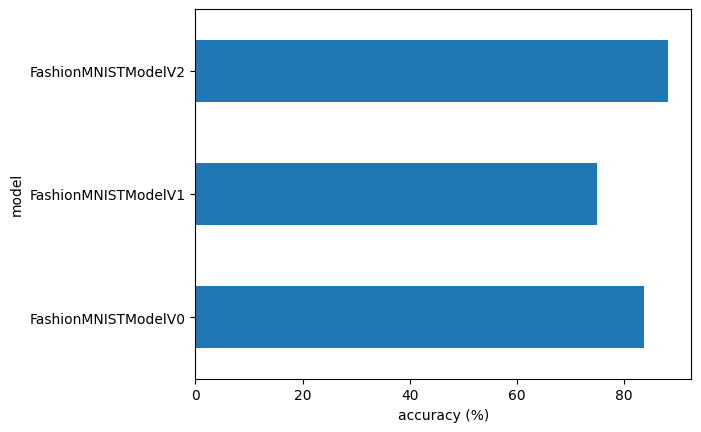

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)  # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.9219e-07, 4.5565e-08, 1.0895e-07, 9.0478e-08, 3.3194e-08, 9.9986e-01,
         1.3149e-07, 4.3559e-06, 2.5781e-05, 1.0687e-04],
        [3.0492e-02, 6.4374e-01, 8.4871e-04, 4.3748e-02, 1.2369e-01, 4.1226e-04,
         1.5677e-01, 5.6025e-05, 6.6166e-05, 1.7730e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

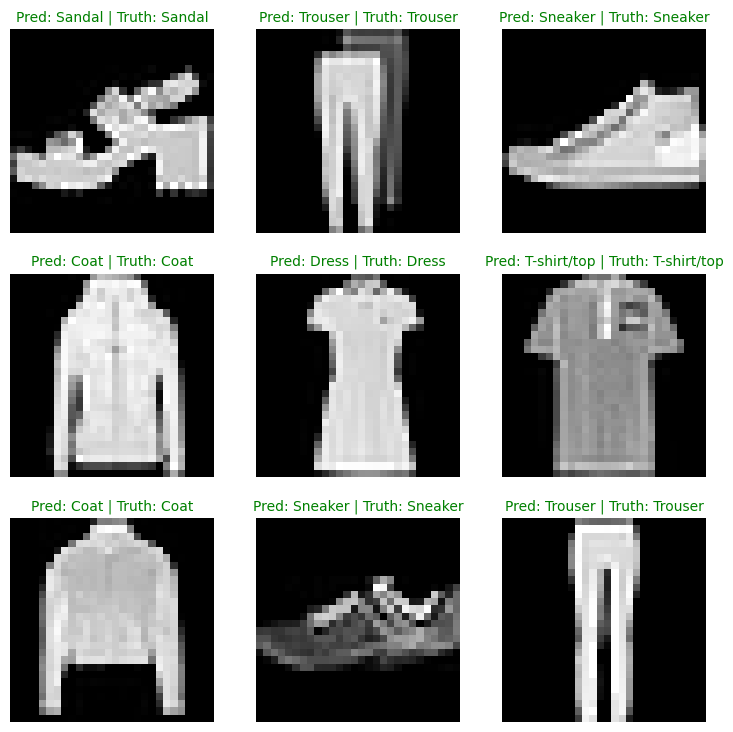

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]]

    # Create a title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')  # green test if correct
    else:
        plt.title(title_text, fontsize=10, c='r')  # red text if wrong

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.


In [ ]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_preds_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics and mlxtend exists, if not install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split('.')[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend  # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 36.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split('.')[1]) >= 19

0.22.0


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

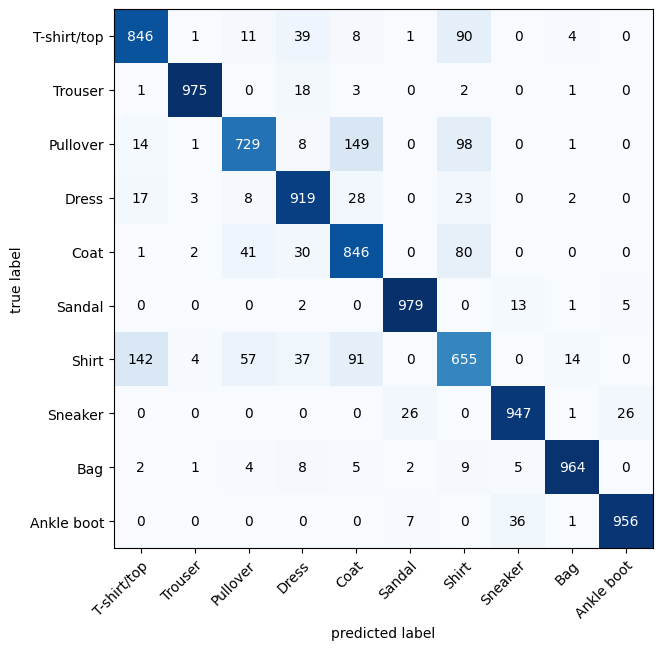

In [ ]:
# 2. Setup confusion matrix instance and compare predictions to targets
conf_mat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conf_mat_tensor = conf_mat(preds=y_preds_tensor,
                           target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(),  # matplotlib likes working with NumPy
    class_names=class_names,  # turn the row and column labels into class names
    figsize=(10, 7)
)

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".
And the same for predcting "Shirt" for classes that are actually labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

## 11. Save and load best performing model

Recall from `torch_01_workflow_fundamentals` we can save and load a PyTorch model using a combination of:
- `torch.save` — a function to save a whole PyTorch model or a model's `state_dict()`.
- `torch.load` — a function to load in a saved PyTorch object.
- `torch.nn.Module.load_state_dict()` — a function to load a saved `state_dict()` into an existing model instance.

In [ ]:
# Create models directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,  # create parent directories if needed
                 exist_ok=True)  # if models directory already exists, don't error

# Create model save path
MODEL_NAME = "03_torch_cv_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [ ]:
# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),  # only saving the state_dict() — only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_torch_cv_model_2.pth


In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,  # try changing this to 128 and seeing what happens
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252689242362976,
 'model_acc': 88.16892971246007}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3252689242362976,
 'model_acc': 88.16892971246007}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,  # absolute tolerance
              rtol=0.0001)  # relative tolerance

tensor(True)

## Exercises

In [ ]:
# Write device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## Exercise - 1

3 areas in the industry where computer vision is currently being used are:
- Autonomous vehicles;
- Quality control in the manufacturing industry;
- Surveillance And Threat Detection via video cameras.

## Exercise - 2

Overfitting is a concept, which occurs when a statistical model fits exactly against its training data. When this happens, the algorithm unfortunately cannot perform accurately against unseen data, defeating its purpose. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

## Exercise - 3

To prevent overfitting here are a few of the most popular solutions:
- **Cross-validation** — Use you initial training data to generate multiple mini train-test splits. Use these splits to tune your model.
- **Early stopping** — Up until a certain number of iterations, new iterations improve the model. After that point, however, the model's ability to generalize can weaken as it begins to overfit the training data. Early stopping refers to stopping the training process before the learner passes that point.
- **Regularization** — refers to a broad range of techniques for artificially forcing your model to be simpler. The method will depend on the type of learner you're using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression.

## Exercise - 4

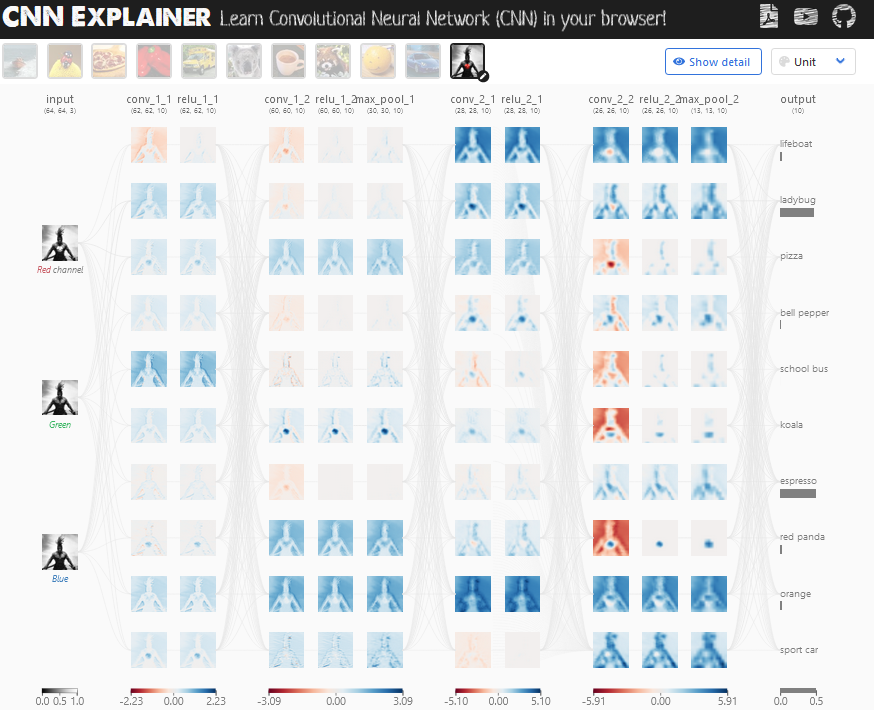

## Exercise - 5

In [ ]:
# Setup training MNIST data
mnist_train = datasets.MNIST(
    root="data",  # where to download data to?
    train=True,  # get training set or not
    download=True,  # download data if it does not exist on disk
    transform=ToTensor(), # images come as PIL format, so we turn they into `torch.Tensor`
    target_transform=None  # Don't transform labels
)

# Setup testing MNIST data
mnist_test = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 363427226.15it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31802492.47it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 177864141.05it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20617455.38it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Define classes_names
classes_names = mnist_train.classes
classes_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Exercise - 6

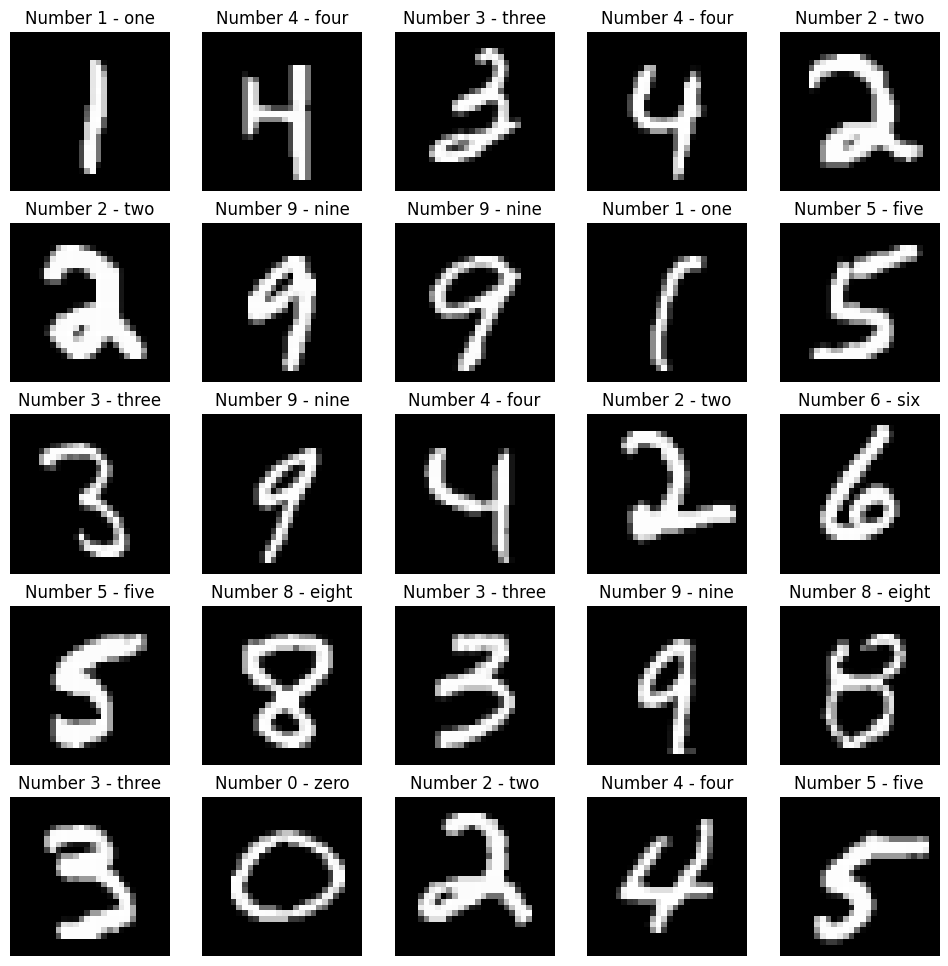

In [ ]:
# Visualize 5+ random samples of our data
torch.manual_seed(17)
fig = plt.figure(figsize=(12, 12))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(mnist_train), size=[1]).item()
    image, target = mnist_train[random_idx]

    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Number {classes_names[target]}")
    plt.axis(False)

## Exercise - 7

In [ ]:
# Define batch size parameter
batches = 32

In [ ]:
# Turn dataset to torch.utils.data.DataLoader object
mnist_train_loader = DataLoader(mnist_train,
                                batch_size=batches,
                                shuffle=True)  # shuffle data because it is training data

mnist_test_loader = DataLoader(mnist_test,
                               batch_size=batches,
                               shuffle=False)  # do not shuffle test data

In [ ]:
# Check data in data loader
train_data_batch, train_target_batch = next(iter(mnist_train_loader))
train_data_batch.shape, train_target_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Target: 5 - five, target size: torch.Size([])


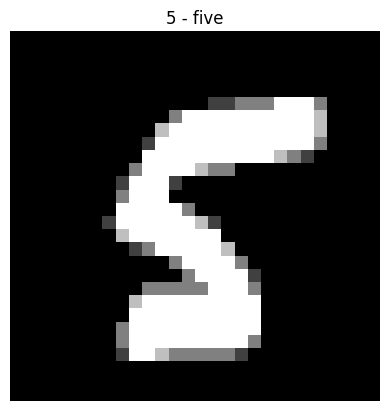

In [ ]:
# Show a sample from data loader
torch.manual_seed(17)
random_idx = torch.randint(0, len(train_data_batch), size=[1]).item()
image, target = train_data_batch[random_idx], train_target_batch[random_idx]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes_names[target])
plt.axis("off")
print(f"Image size: {image.shape}")
print(f"Target: {classes_names[target]}, target size: {target.shape}")

## Exercise - 8

In [ ]:
# Recreate model for MNIST dataset
class MNISTModelV0(nn.Module):
    """
    Model architecture copying TineVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [ ]:
torch.manual_seed(17)
# Initial model object for MNIST dataset
cpu_mnist_model = MNISTModelV0(input_shape=1,
                               hidden_units=10,
                               output_shape=len(classes_names)).to("cpu")
cpu_mnist_model

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(17)
# Initial model object for MNIST dataset
gpu_mnist_model = MNISTModelV0(input_shape=1,
                               hidden_units=10,
                               output_shape=len(classes_names)).to(device)
gpu_mnist_model

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Exercise - 9

In [ ]:
# Define loss function
loss_fun = nn.CrossEntropyLoss()

In [ ]:
# Define accuracy function and optimizer for cpu
cpu_torch_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_names)).to("cpu")
cpu_sgd_opt = torch.optim.SGD(cpu_mnist_model.parameters(),
                              lr=0.1)

In [ ]:
# Define accuracy function and optimizer for gpu (cuda)
gpu_torch_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_names)).to(device)
gpu_sgd_opt = torch.optim.SGD(gpu_mnist_model.parameters(),
                              lr=0.1)

### Edit train and test step functions

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_score: torchmetrics.Accuracy,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_preds = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_score(y_preds.argmax(dim=1), y)  # Go from logits -> prediction labels

        # 3. Optimizer zero gradients
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_score: torchmetrics.Accuracy,
              device: torch.device = device):

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_preds = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_preds, y)
            test_acc += accuracy_score(test_preds.argmax(dim=1), y)  # Go from logits -> prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%\n")

### Test train time on CPU

In [ ]:
torch.manual_seed(17)

# Measure time
cpu_train_start = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=mnist_train_loader,
               model=cpu_mnist_model,
               loss_fn=loss_fun,
               optimizer=cpu_sgd_opt,
               accuracy_score=cpu_torch_accuracy,
               device="cpu")

    test_step(data_loader=mnist_test_loader,
              model=cpu_mnist_model,
              loss_fn=loss_fun,
              accuracy_score=cpu_torch_accuracy,
              device="cpu")

cpu_train_end = timer()
cpu_total_train_time = print_train_time(start=cpu_train_start,
                                        end=cpu_train_end,
                                        device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.3050 | Train Accuracy: 0.90%
Test Loss: 0.0976 | Test Accuracy: 0.97%

Epoch: 1
---------
Train Loss: 0.0712 | Train Accuracy: 0.98%
Test Loss: 0.0495 | Test Accuracy: 0.98%

Epoch: 2
---------
Train Loss: 0.0560 | Train Accuracy: 0.98%
Test Loss: 0.0398 | Test Accuracy: 0.99%

Train time on cpu: 111.964 seconds


### Test train time on GPU

In [ ]:
torch.manual_seed(17)

# Measure time
gpu_train_start = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=mnist_train_loader,
               model=gpu_mnist_model,
               loss_fn=loss_fun,
               optimizer=gpu_sgd_opt,
               accuracy_score=gpu_torch_accuracy,
               device=device)

    test_step(data_loader=mnist_test_loader,
              model=gpu_mnist_model,
              loss_fn=loss_fun,
              accuracy_score=gpu_torch_accuracy,
              device=device)

gpu_train_end = timer()
gpu_total_train_time = print_train_time(start=gpu_train_start,
                                        end=gpu_train_end,
                                        device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.3094 | Train Accuracy: 0.90%
Test Loss: 0.1009 | Test Accuracy: 0.97%

Epoch: 1
---------
Train Loss: 0.0709 | Train Accuracy: 0.98%
Test Loss: 0.0478 | Test Accuracy: 0.98%

Epoch: 2
---------
Train Loss: 0.0554 | Train Accuracy: 0.98%
Test Loss: 0.0424 | Test Accuracy: 0.99%

Train time on cuda: 52.371 seconds


## Exercise - 10

In [ ]:
random.seed(17)
test_samples = []
test_labels = []
for sample, label in random.sample(list(mnist_test), k=12):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\n"+
       "Test sample label: {test_labels[0]} ({classes_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: {test_labels[0]} ({classes_names[test_labels[0]]})


In [ ]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=gpu_mnist_model,
                              data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[8.9502e-16, 1.8799e-10, 1.1135e-10, 1.5990e-13, 1.0000e+00, 1.9800e-12,
         8.3546e-14, 3.2751e-10, 1.4263e-09, 1.4088e-09],
        [4.9006e-07, 2.3823e-05, 9.9768e-01, 1.1014e-05, 1.4019e-04, 5.3990e-07,
         7.1793e-08, 2.1389e-03, 4.9653e-07, 3.3593e-07]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 2, 5, 0, 4, 8, 1, 2, 3, 0, 9, 6])

In [ ]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([4, 2, 5, 0, 4, 8, 1, 2, 3, 0, 9, 6],
 tensor([4, 2, 5, 0, 4, 8, 1, 2, 3, 0, 9, 6]))

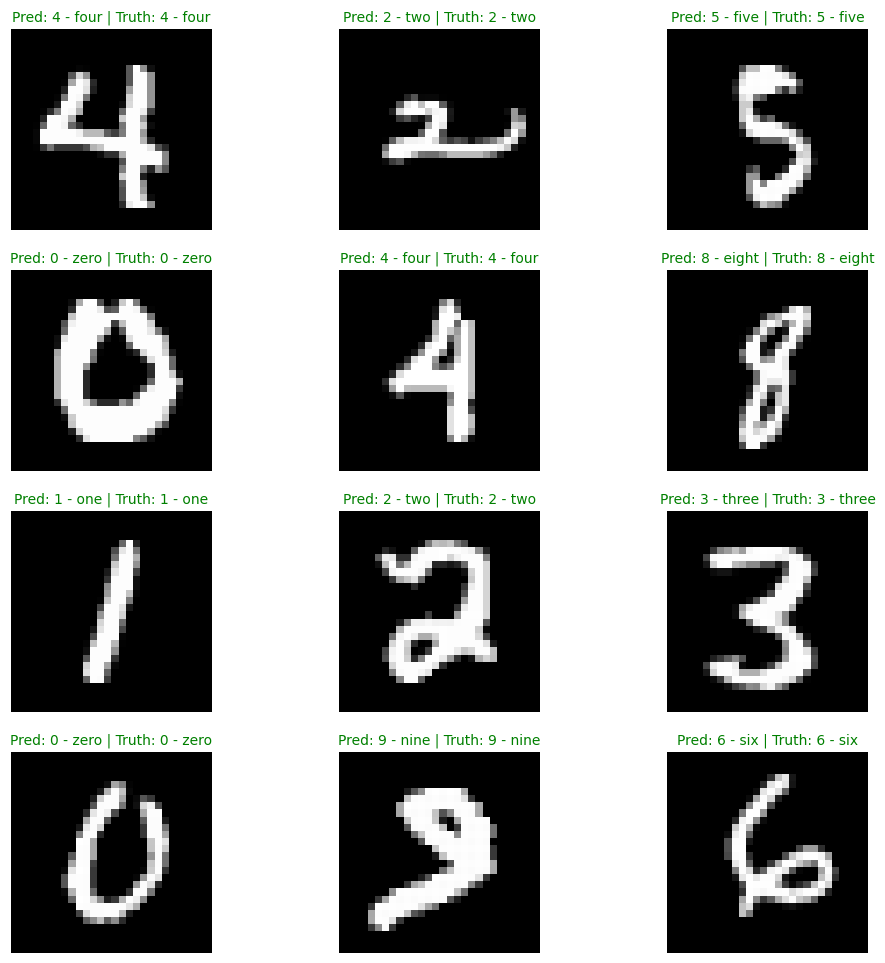

In [ ]:
# Plot predictions
plt.figure(figsize=(12, 12))
nrows = 4
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Coat")
    pred_label = classes_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "Dress")
    truth_label = classes_names[test_labels[i]]

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')  # green text if prediction is correct
    else:
        plt.title(title_text, fontsize=10, c='r')  # red text if prediction is wrong

    plt.axis(False)

## Exercise - 11

In [ ]:
y_preds = []
gpu_mnist_model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logits = gpu_mnist_model(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

    # Concatenate list of predictions into a tensor
    y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

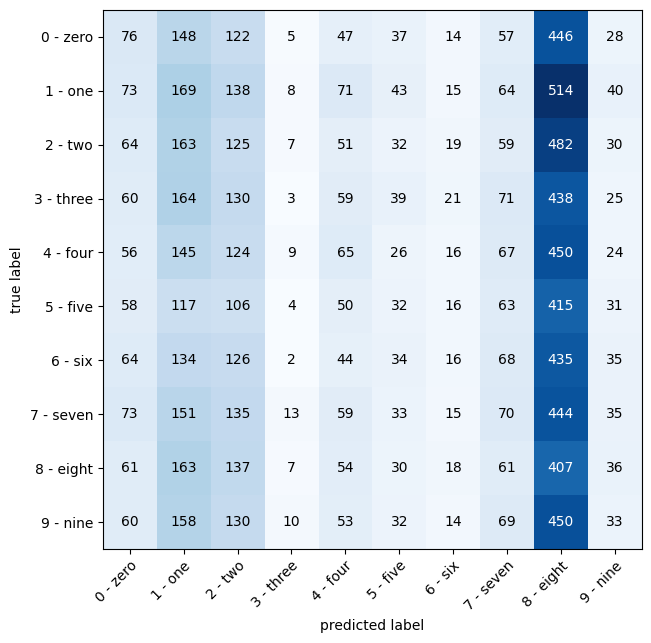

In [ ]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(classes_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=mnist_test.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=classes_names,
    figsize=(10, 7)
)

## Exercise - 12

In [ ]:
torch.manual_seed(17)

# Create sample batch of one random numbers sample
batch_image_sample = torch.randn(size=(1, 3, 64, 64))  # [batch_size, color_channels, height, width]
test_image = batch_image_sample[0]
print(f"Image batch shape: {batch_image_sample.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[-1.0462,  1.2305,  1.8662,  ...,  0.7583, -0.4860,  1.0937],
         [-0.0075,  0.3962, -0.1930,  ..., -0.8015,  0.7319,  0.1119],
         [ 0.0338,  0.1462, -0.1896,  ..., -0.3051, -0.2397, -0.9120],
         ...,
         [-1.4329, -0.3225,  0.4821,  ...,  1.5031,  1.2173,  0.6271],
         [-0.4051,  0.4924, -1.0154,  ..., -0.5115,  1.1066,  0.5070],
         [-0.4146, -0.5333,  0.4615,  ..., -1.2449, -1.2051,  0.6214]],

        [[ 1.1345, -1.5356, -1.1667,  ...,  0.1376, -1.2307,  0.2684],
         [ 1.5764, -1.1082,  0.6290,  ..., -0.0932, -0.5865,  1.0864],
         [-2.1419,  1.6768, -0.2496,  ...,  0.3100,  0.0433, -0.8484],
         ...,
         [-0.6080,  1.3679, -1.9346,  ...,  0.9443, -0.8408,  0.4130],
         [ 0.9834,  1.6583,  0.2593,  ...,  0.0045,  0.0309, 

In [ ]:
torch.manual_seed(17)

# Create a convolutional layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=15,
                       kernel_size=3,
                       stride=2,
                       padding="valid")

# Pass the data through the convolutional layer
conv_res = conv_layer(test_image)
print(f"Shape before convolution: {test_image.shape}; Shape after convolution: {conv_res.shape}")

Shape before convolution: torch.Size([3, 64, 64]); Shape after convolution: torch.Size([15, 31, 31])


In [ ]:
torch.manual_seed(17)

# Check what happens if kernel size be a 4
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=15,
                       kernel_size=4,
                       stride=2,
                       padding="valid")

# Pass the data through the convolutional layer
conv_res = conv_layer(test_image)
print(f"Shape before convolution: {test_image.shape}; Shape after convolution: {conv_res.shape}")

Shape before convolution: torch.Size([3, 64, 64]); Shape after convolution: torch.Size([15, 31, 31])


In the result, we see that kernel size on the level of 4 produces no difference because with parameter padding = "valid" and stride = 2, our result makes the same shape as the input shape.

## Exercise - 13

In [ ]:
import random
random.seed(17)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=12):
    test_samples.append(sample)
    test_labels.append(label)

In [ ]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
# Turn the predictions probabilities into prediction labels
pred_classes = pred_probs.argmax(dim=1)

# Are our predictions in the same form as our test labels?
test_labels, pred_classes.numpy()

([1, 4, 1, 6, 1, 7, 3, 4, 9, 9, 9, 4],
 array([1, 4, 1, 6, 1, 7, 3, 6, 9, 7, 9, 6]))

<ipython-input-89-3fe074a4513a>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, j)


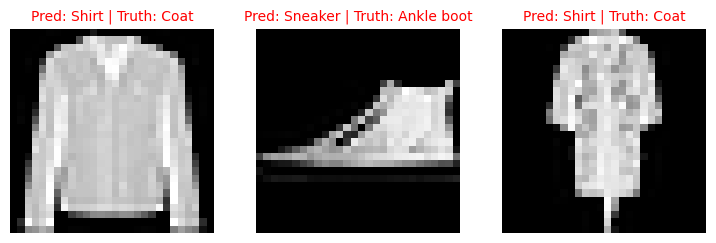

In [ ]:
from itertools import count
# Plot only wrong predictions
len_wrong_preds = [pred_classes[i] == test_labels[i] for i in range(0, len(pred_classes))].count(False)

plt.figure(figsize=(9, 9))
nrows = len_wrong_preds
ncols = len_wrong_preds
counter = count(1, 1)

for i, sample in enumerate(test_samples):
    # Check for equality and not plot or plot accordingly
    if pred_classes[i] != test_labels[i]:
        j = next(counter)
        # Create a subplot
        plt.subplot(nrows, ncols, j)
        # Plot the image
        plt.imshow(sample.squeeze(), cmap="gray")

        # Find the prediction label (in text form)
        pred_label = class_names[pred_classes[i]]

        # Get the truth label (in text form)
        truth_label = class_names[test_labels[i]]

        # Set the title
        title_text = f"Pred: {pred_label} | Truth: {truth_label}"
        plt.title(title_text, fontsize=10, c='r')
    # else:
    #     plt.imshow(sample.squeeze(), cmap="gray")
    #     title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    #     plt.title(title_text, fontsize=10, c='g')

        plt.axis(False)

In the result, we see that model gets confused by coople Coat/Shirt, and Sneakers/Ankle boots, and that is because these stuff really have the very same look.